# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [20]:
!pip install sk-video
!pip install Pillow
!pip install opencv-python

In [24]:
# Loading necessary libraries

import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 
from scipy.ndimage import gaussian_filter


# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

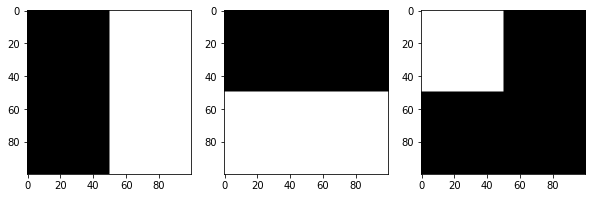

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


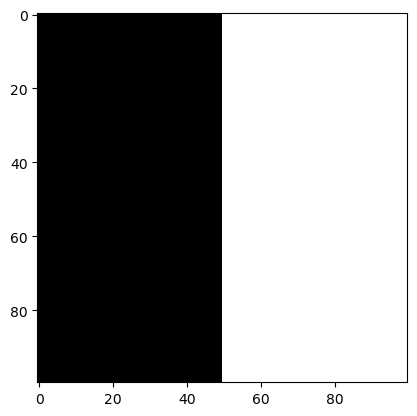

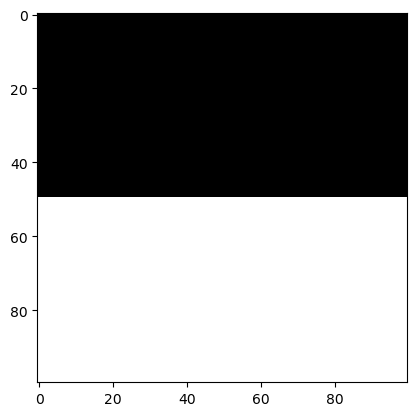

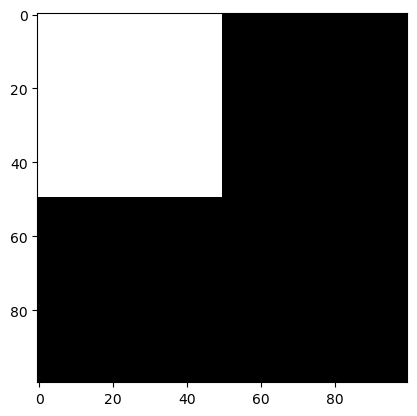

In [26]:

# Create a 100x100 array of zeros (black)
image = np.zeros((100, 100))

# Set the right half of the image to 1 (white)
image[:, 50:] = 1

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('on')  # Hide the axes
plt.show()


# Create a 100x100 array of zeros (black)
image = np.zeros((100, 100))

# Set the bottom half of the image to 1 (white)
image[50:] = 1

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('on')  # Hide the axes
plt.show()



# Create a 100x100 array of ones (white)
image = np.ones((100, 100))



# Create a 100x100 array of zeros (black)
image = np.zeros((100, 100))

# Set the top-left 25x25 square to 1 (white)
image[:50, :50] = 1

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('on')  # Hide the axes
plt.show()



*   Use the above three images to create the following image

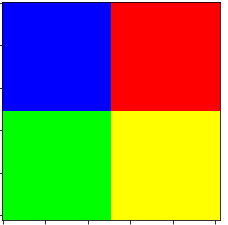
*Hint: Remember channels and color spaces*

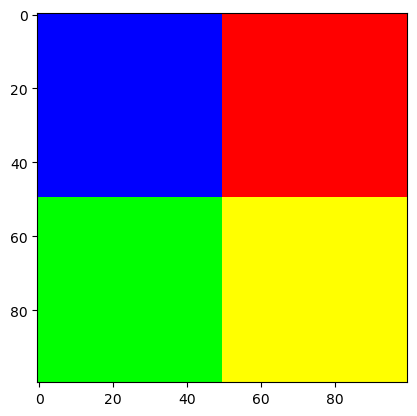

In [28]:


# Create a 100x100 array
image = np.zeros((100, 100, 3))  # 3 for RGB channels

# Top-left (Blue)
image[:50, :50] = [0, 0, 1]  # RGB value for Blue

# Top-right (Red)
image[:50, 50:] = [1, 0, 0]  # RGB value for Red

# Bottom-left (Green)
image[50:, :50] = [0, 1, 0]  # RGB value for Green

# Bottom-right (Yellow)
image[50:, 50:] = [1, 1, 0]  # RGB value for Yellow

# Display the image
plt.imshow(image)
plt.axis('on')  # Hide the axes
plt.show()


### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

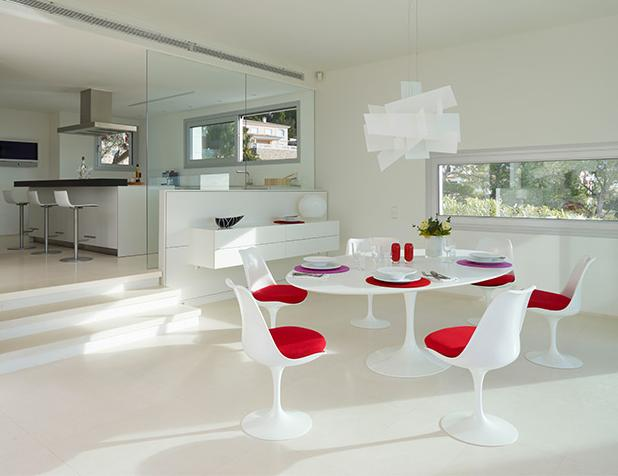

*   Extract individual channels and plot them using matplotlib subplot.



*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

In [30]:
image = Image.open(r"C:\Users\sombe\Downloads\sillas.jpg")

data = asarray(image)

sigmas = [0, 1, 5, 10]
for i, std in enumerate(sigmas):
    data_filtered = gaussian_filter(data, sigma=std)
    plt.subplot(1, 4, i+1)
    plt.imshow(data_filtered, cmap='gray')
    plt.title(f'Sigma={std}')
plt.show()



NameError: name 'Image' is not defined

<class 'numpy.ndarray'>


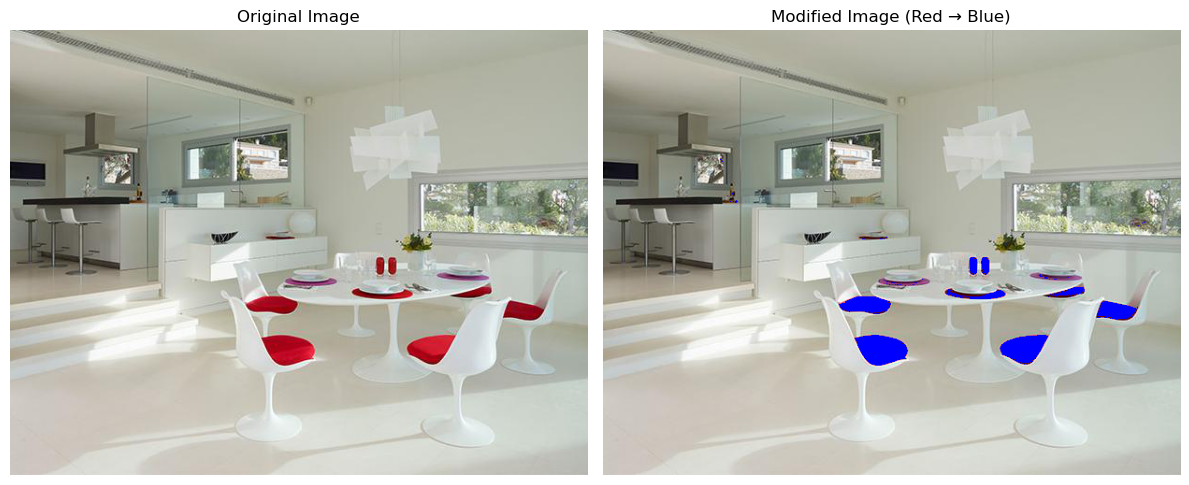

In [32]:
# solution

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
image = Image.open(r"C:\Users\sombe\Downloads\sillas.jpg")

# Convert the image to a numpy array
data = np.asarray(image)
print(type(data))  # Confirm it's a numpy array

# Copy the original image data for modification
data_modified = data.copy()

# Replace red pixels with blue
# A red pixel can be identified as [255, 0, 0] in RGB
red_mask = (data_modified[:, :, 0] > 110) & (data_modified[:, :, 1] < 100) & (data_modified[:, :, 2] < 100)
data_modified[red_mask] = [0, 0, 255]  # Change to blue [0, 0, 255]

# Visualize the original and modified images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Show original image
ax[0].imshow(data)
ax[0].set_title("Original Image")
ax[0].axis('off')

# Show modified image
ax[1].imshow(data_modified)
ax[1].set_title("Modified Image (Red → Blue)")
ax[1].axis('off')

plt.tight_layout()
plt.show()


# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

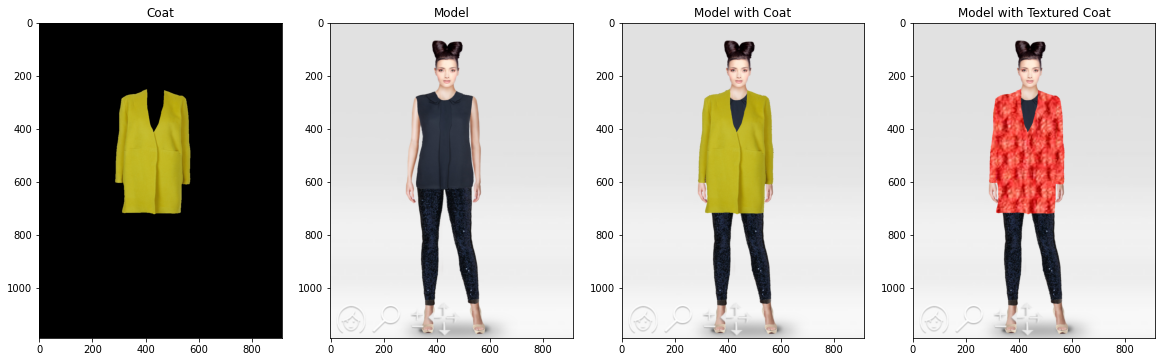

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.transform import resize

# Load the images
model = Image.open(r"C:\Users\sombe\Downloads\model.png")
coat = Image.open(r"C:\Users\sombe\Downloads\coat.png")
texture = Image.open(r"C:\Users\sombe\Downloads\texture2.png")

# Ensure all images have the same size
model = resize(model, coat.shape, anti_aliasing=True)
texture = resize(texture, coat.shape, anti_aliasing=True)

# Convert coat to grayscale to create a mask
coat_gray = color.rgb2gray(coat)
mask = coat_gray > 0.5  # Binary mask where coat pixels are 1 and background is 0

# Overlay the coat on the model
model_with_coat = model.copy()
model_with_coat[mask] = coat[mask]

# Change the coat texture
textured_coat = model.copy()
textured_coat[mask] = texture[mask]

# Visualize the results
fig, axes = plt.subplots(1, 4, figsize=(16, 8))

axes[0].imshow(model)
axes[0].set_title('Model')
axes[0].axis('off')

axes[1].imshow(coat)
axes[1].set_title('Coat')
axes[1].axis('off')

axes[2].imshow(model_with_coat)
axes[2].set_title('Model Wearing Coat')
axes[2].axis('off')

axes[3].imshow(textured_coat)
axes[3].set_title('Textured Coat')
axes[3].axis('off')

plt.tight_layout()
plt.show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




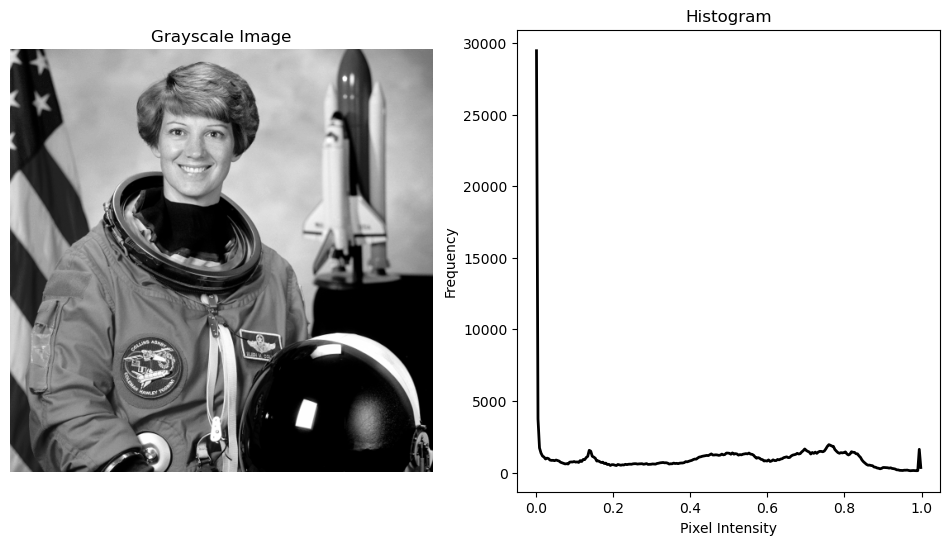

In [3]:
from skimage import data, color, exposure
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
astronaut = data.astronaut()
astronaut_gray = color.rgb2gray(astronaut)

# Compute the histogram
hist, bin_centers = exposure.histogram(astronaut_gray)

# Plot the grayscale image and its histogram
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Grayscale image
ax[0].imshow(astronaut_gray, cmap="gray")
ax[0].set_title("Grayscale Image")
ax[0].axis("off")

# Histogram
ax[1].plot(bin_centers, hist, lw=2, color='black')
ax[1].set_title("Histogram")
ax[1].set_xlabel("Pixel Intensity")
ax[1].set_ylabel("Frequency")
plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

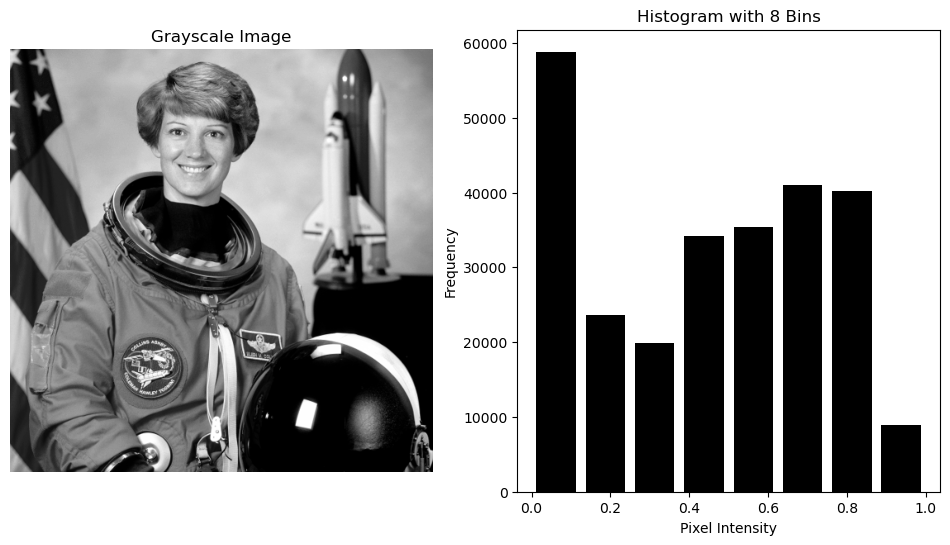

In [14]:

from skimage import data, color, exposure
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
astronaut = data.astronaut()
astronaut_gray = color.rgb2gray(astronaut)

# Compute the histogram with 8 bins
hist, bin_centers = exposure.histogram(astronaut_gray, nbins=8)

# Plot the grayscale image and its histogram
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Grayscale image
ax[0].imshow(astronaut_gray, cmap="gray")
ax[0].set_title("Grayscale Image")
ax[0].axis("off")

# Histogram with 8 bins
ax[1].bar(bin_centers, hist, width=0.1, color='black')  # Using bar to show discrete bins
ax[1].set_title("Histogram with 8 Bins")
ax[1].set_xlabel("Pixel Intensity")
ax[1].set_ylabel("Frequency")
plt.show()






*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


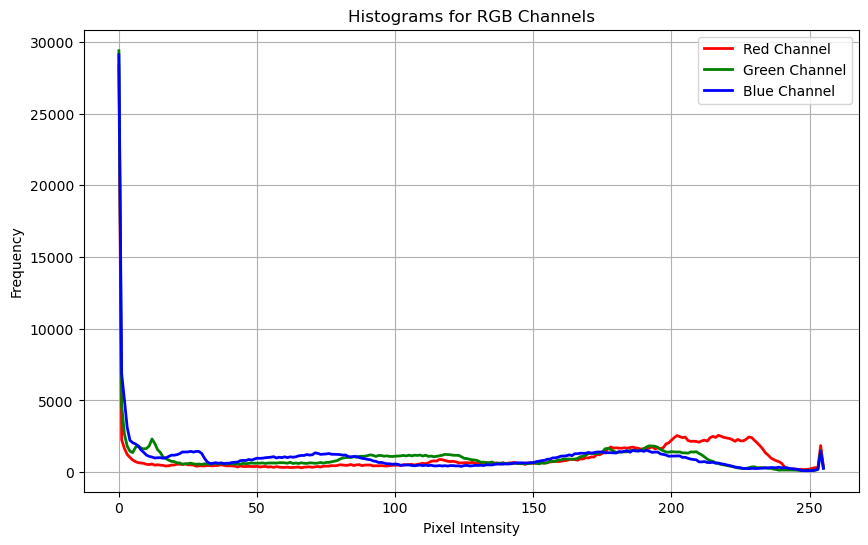

In [16]:
#solution

from skimage import data
import matplotlib.pyplot as plt
from skimage import exposure

# Load the color image
astronaut = data.astronaut()

# Compute the histogram for each color channel (R, G, B)
hist_r, bin_centers_r = exposure.histogram(astronaut[:, :, 0])
hist_g, bin_centers_g = exposure.histogram(astronaut[:, :, 1])
hist_b, bin_centers_b = exposure.histogram(astronaut[:, :, 2])

# Plot the histograms for each channel
plt.figure(figsize=(10, 6))
plt.plot(bin_centers_r, hist_r, color='red', lw=2, label='Red Channel')
plt.plot(bin_centers_g, hist_g, color='green', lw=2, label='Green Channel')
plt.plot(bin_centers_b, hist_b, color='blue', lw=2, label='Blue Channel')

# Total histogram (all channels combined)
plt.title("Histograms for RGB Channels")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



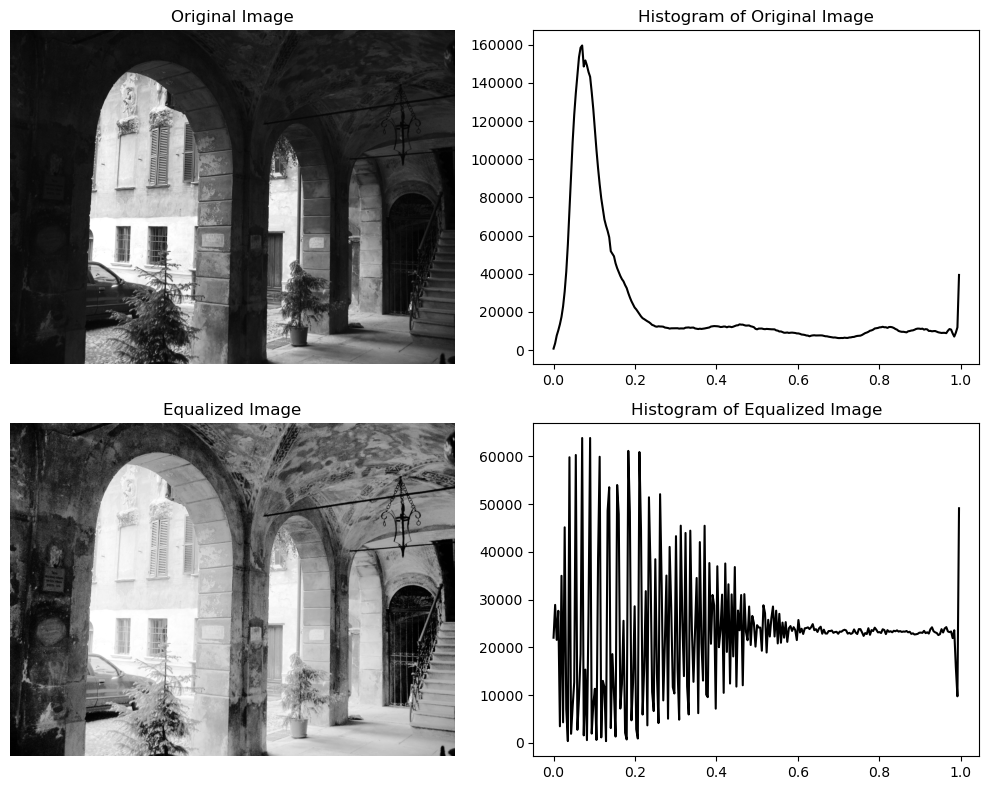

In [3]:
# import
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure, color

# Load the image
iamge_path = r"C:\Users\sombe\Downloads\aquatermi_lowcontrast.jpg"
image = io.imread(iamge_path, as_gray=True)  # Read image in grayscale

# Compute histogram of the original image
hist_original, bins_original = np.histogram(image, bins=256, range=(0, 1))

# Perform histogram equalization
equalized_image = exposure.equalize_hist(image)

# Compute histogram of the equalized image
hist_equalized, bins_equalized = np.histogram(equalized_image, bins=256, range=(0, 1))

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Display original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Display histogram of original image
axes[0, 1].plot(bins_original[:-1], hist_original, color='black')
axes[0, 1].set_title('Histogram of Original Image')

# Display equalized image
axes[1, 0].imshow(equalized_image, cmap='gray')
axes[1, 0].set_title('Equalized Image')
axes[1, 0].axis('off')

# Display histogram of equalized image
axes[1, 1].plot(bins_equalized[:-1], hist_equalized, color='black')
axes[1, 1].set_title('Histogram of Equalized Image')

plt.tight_layout()
plt.show()




*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

Histogram Equalization: Uses CDF and remaps intensity values non-linearly. While Linear Contrast Stretch: Scales intensity values linearly.

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



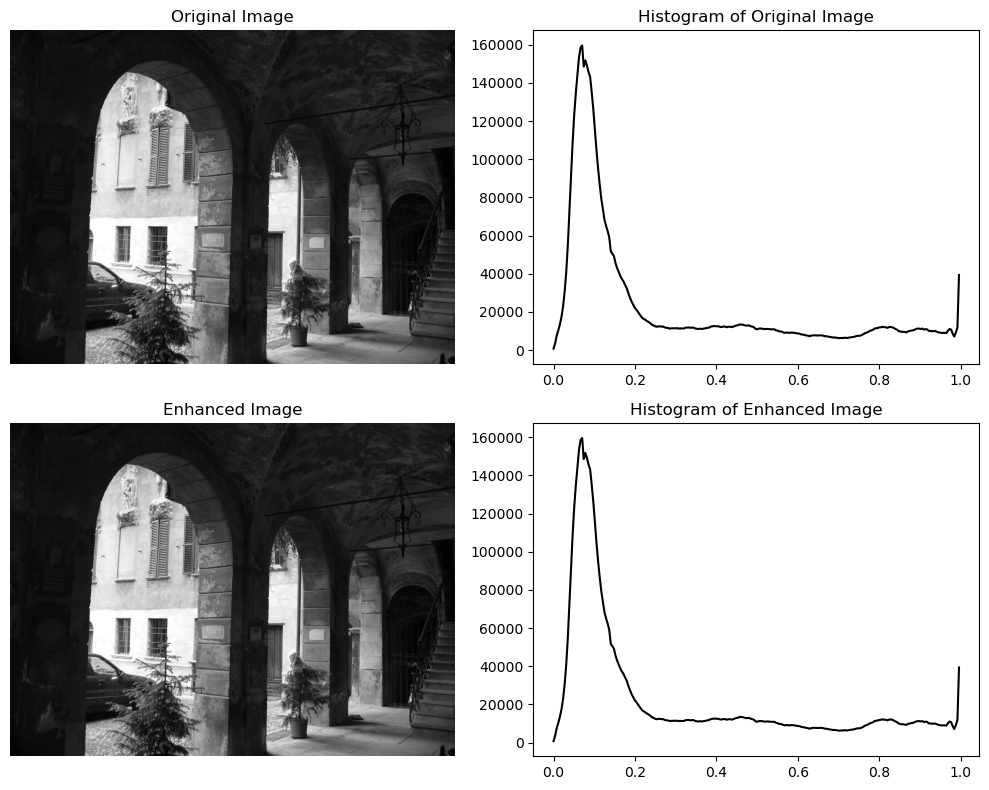

In [9]:
# solution

import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def linear_contrast_stretch(image, bins=256):
    I_min = np.min(image)
    I_max = np.max(image)
    stretched_image = (image - I_min) / (I_max - I_min)
    return stretched_image

# Load the grayscale image
image_path = r"C:\Users\sombe\Downloads\aquatermi_lowcontrast.jpg"
image = io.imread(image_path, as_gray=True)

# Define bins value
bins = 256

# Compute histogram of the original image
hist_original, bins_original = np.histogram(image, bins=bins, range=(0, 1))

# Apply linear contrast stretching
enhanced_image = linear_contrast_stretch(image)

# Compute histogram of the enhanced image
hist_enhanced, bins_enhanced = np.histogram(enhanced_image, bins=bins, range=(0, 1))

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Display original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Display histogram of original image
axes[0, 1].plot(bins_original[:-1], hist_original, color='black')
axes[0, 1].set_title('Histogram of Original Image')

# Display enhanced image
axes[1, 0].imshow(enhanced_image, cmap='gray')
axes[1, 0].set_title('Enhanced Image')
axes[1, 0].axis('off')

# Display histogram of enhanced image
axes[1, 1].plot(bins_enhanced[:-1], hist_enhanced, color='black')
axes[1, 1].set_title('Histogram of Enhanced Image')

plt.tight_layout()
plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




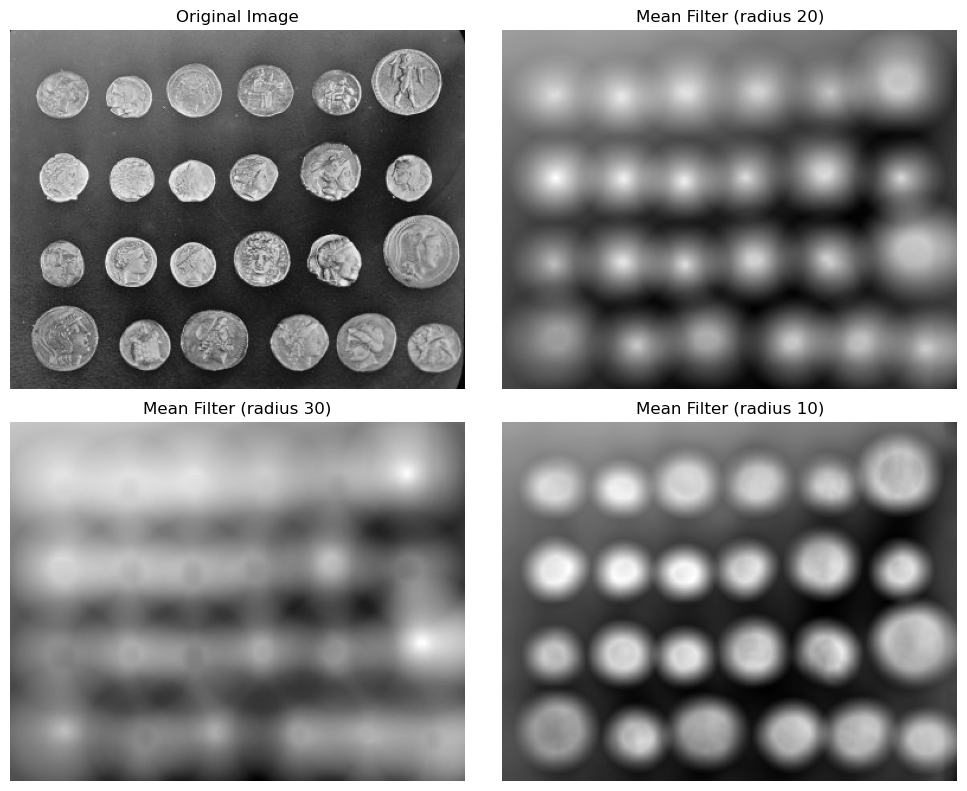

In [11]:
# solution

import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import mean
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte

# Load the coins image
image = data.coins()

# Convert to 8-bit unsigned integer
image = img_as_ubyte(image)

# Define structuring elements with different radii
selem_20 = disk(20)
selem_30 = disk(30)
selem_10 = disk(10)

# Apply mean filter with different structuring elements
mean_20 = mean(image, selem_20)
mean_30 = mean(image, selem_30)
mean_10 = mean(image, selem_10)

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Display original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Display mean filter with radius 20
axes[0, 1].imshow(mean_20, cmap='gray')
axes[0, 1].set_title('Mean Filter (radius 20)')
axes[0, 1].axis('off')

# Display mean filter with radius 30
axes[1, 0].imshow(mean_30, cmap='gray')
axes[1, 0].set_title('Mean Filter (radius 30)')
axes[1, 0].axis('off')

# Display mean filter with radius 10
axes[1, 1].imshow(mean_10, cmap='gray')
axes[1, 1].set_title('Mean Filter (radius 10)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()



*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

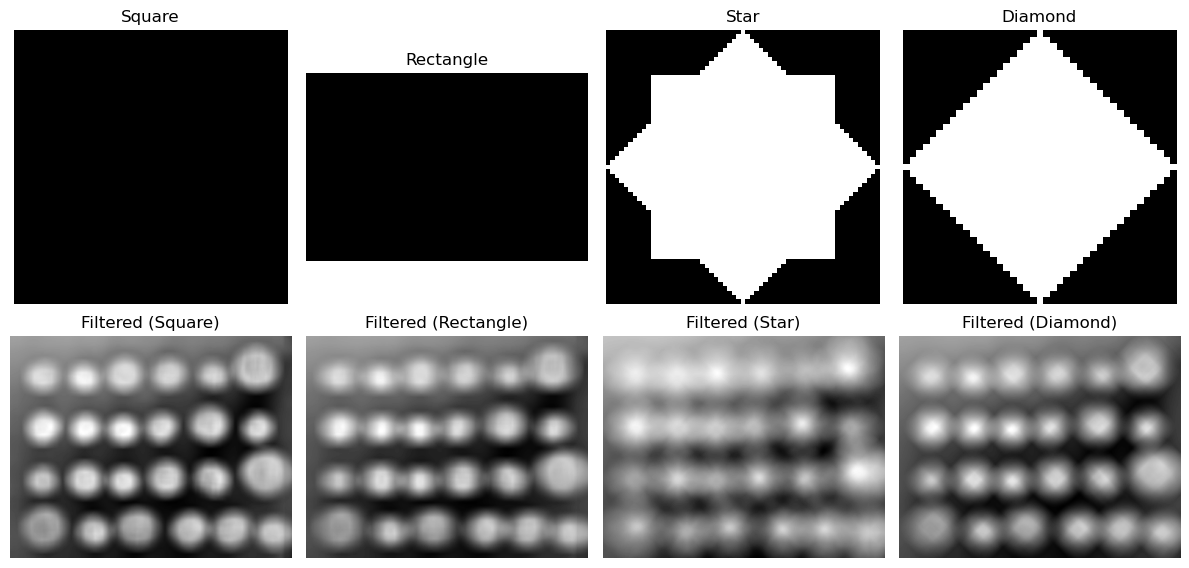

In [13]:
# solution

import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.morphology import square, rectangle, star, diamond
from skimage.filters.rank import mean
from skimage.util import img_as_ubyte

# Load the coins image
image = data.coins()
image = img_as_ubyte(image)  # Convert to 8-bit unsigned integer

# Define different structuring elements
selems = {
    "Square": square(20),
    "Rectangle": rectangle(20, 30),
    "Star": star(20),
    "Diamond": diamond(20)
}

# Apply mean filter with different structuring elements
filtered_images = {name: mean(image, selem) for name, selem in selems.items()}

# Create subplots
fig, axes = plt.subplots(2, len(selems), figsize=(12, 6))

# Display structuring elements
for i, (name, selem) in enumerate(selems.items()):
    axes[0, i].imshow(selem, cmap='gray')
    axes[0, i].set_title(name)
    axes[0, i].axis('off')

# Display filtered images
for i, (name, filtered) in enumerate(filtered_images.items()):
    axes[1, i].imshow(filtered, cmap='gray')
    axes[1, i].set_title(f"Filtered ({name})")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

The smaller the radius, the sharper the image.
...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

The bigger the radius, the smoother the image.
...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

Mean Filter:
Averages all pixel values within the filter window, Blurs the image uniformly. Simple in comparison to Gaussian filter.	Use: removing b/w noise, smoothing, better for low computational resources.	

Gaussian Filter:
Uses a weighted average where nearby pixels have higher weights. Blurs the image while preserving edges better. Complex, in comparison to mean filter. Use: Reducing Gaussian noise. Preprocessing before edge detection. Improving feature extraction in machine learning.
...